# Project on prediction of "Total Revovling Balance"

In [1]:
# Import necessary libraries

In [2]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import the dataset

In [4]:
data = pd.read_csv("D:\Data science\Projects docs\Project 1 (Total revolving balance)\Data.csv", low_memory=False, encoding = "latin1")
data.head()

,member_id,loan_amnt,terms,batch_ID,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,58189336,14350,36 months,,19.19,E,E3,clerk,9 years,OWN,...,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0
1,70011223,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0
2,70255675,10000,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0
3,1893936,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0
4,7652106,16000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0


In [5]:
# Getting the initial information from the data

In [6]:
data.shape

(887379, 36)

In [7]:
data.describe()

,member_id,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,...,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
count,8.873790e+05,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,...,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887350.000000,8.171030e+05,8.171030e+05
mean,3.500182e+07,14755.264605,13.246740,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,...,25.268026,1754.804327,0.396692,45.919243,4.880757,0.014380,44.104838,0.004991,2.257026e+02,1.394582e+05
std,2.411335e+07,8435.455601,4.381867,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,...,11.840561,2095.356099,4.087825,409.693874,63.125281,0.134191,22.179841,0.077625,1.031137e+04,1.537500e+05
min,7.047300e+04,500.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.087713e+07,8000.000000,9.990000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,...,17.000000,441.460000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000e+00,2.985300e+04
50%,3.709528e+07,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,...,24.000000,1073.280000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000e+00,8.055900e+04
75%,5.847135e+07,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,...,32.000000,2238.265000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000e+00,2.082050e+05
max,7.354484e+07,35000.000000,28.990000,9.500000e+06,9999.000000,39.000000,33.000000,188.000000,129.000000,90.000000,...,169.000000,24205.620000,358.680000,33520.270000,7002.190000,20.000000,188.000000,14.000000,9.152545e+06,8.000078e+06


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    887379 non-null  int64  
 1   loan_amnt                    887379 non-null  int64  
 2   terms                        887379 non-null  object 
 3   batch_ID                     756631 non-null  object 
 4   Rate_of_intrst               887379 non-null  float64
 5   grade                        887379 non-null  object 
 6   sub_grade                    887379 non-null  object 
 7   Emp_designation              835917 non-null  object 
 8   Experience                   842554 non-null  object 
 9   home_ownership               887379 non-null  object 
 10  annual_inc                   887375 non-null  float64
 11  verification_status          887379 non-null  object 
 12  purpose                      887379 non-null  object 
 13 

## Exploratory Data Analysis

In [9]:
# Checking the null values in the dataset interms of percentage

In [10]:
features_na = [feature for feature in data.columns if data[feature].isnull().sum()>1]

In [11]:
print('\033[1m'+ "Missing values in each variable,"+ "\033[0m")
for feature in features_na:
    percentage = (np.round(data[feature].isnull().mean(), 4)*100)
    print(feature," - " "%.2f" % percentage,"%")

Missing values in each variable,
batch_ID   - 14.73 %
Emp_designation  - 5.80 %
Experience  - 5.05 %
annual_inc  - 0.00 %
delinq_2yrs  - 0.00 %
inq_last_6mths  - 0.00 %
mths_since_last_delinq  - 51.20 %
mths_since_last_record  - 84.56 %
numb_credit  - 0.00 %
pub_rec  - 0.00 %
total_credits  - 0.00 %
collections_12_mths_ex_med  - 0.02 %
mths_since_last_major_derog  - 75.02 %
verification_status_joint  - 99.94 %
acc_now_delinq  - 0.00 %
tot_colle_amt  - 7.92 %
tot_curr_bal  - 7.92 %


In [12]:
# Using heatmap to see the null values in each column

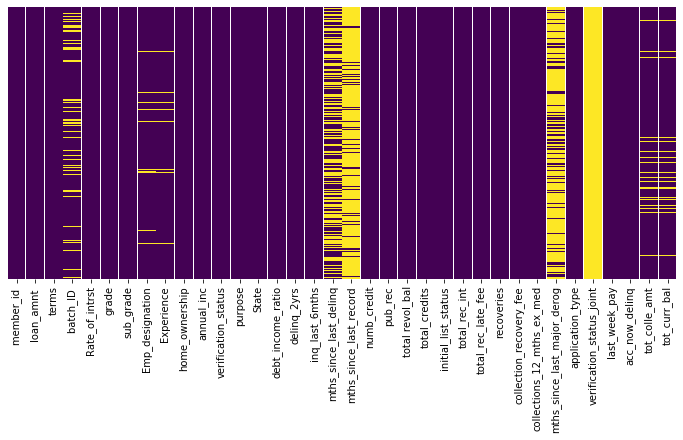

In [13]:
plt.figure(figsize = (12,5))
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap ="viridis")

In [14]:
# Columns with more than 75% null values

In [15]:
for feature in features_na:
    if data[feature].isnull().mean() > 0.75:
        print(feature, " - ",(np.round(data[feature].isnull().mean(), 4)*100), "%")

mths_since_last_record  -  84.56 %
mths_since_last_major_derog  -  75.02 %
verification_status_joint  -  99.94 %


#### The 3 columns 'mths_since_last_record', 'mths_since_last_major_derog' and 'verification_status_joint'   have more than 75% missing values, hence they are dropped.

#### The columns like 'member_id' and 'batch_ID' are also dropped as they are not so useful in the analysis

In [16]:
dataset = data.drop(columns=['mths_since_last_record','mths_since_last_major_derog', 'verification_status_joint','member_id ','batch_ID '], axis=1)

In [17]:
dataset.shape

(887379, 31)

### Numerical variables in the data

In [18]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != "O"]
print("Number of numerical features:", len(numerical_features))

Number of numerical features: 19


In [19]:
dataset[numerical_features].head()

,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,numb_credit,pub_rec,total revol_bal,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,14350,19.19,28700.0,33.88,0.0,1.0,50.0,14.0,1.0,22515.0,28.0,1173.84,0.0,0.0,0.0,0.0,0.0,0.0,28699.0
1,4800,10.99,65000.0,3.64,0.0,1.0,NaN,6.0,0.0,7624.0,13.0,83.95,0.0,0.0,0.0,0.0,0.0,0.0,9974.0
2,10000,7.26,45000.0,18.42,0.0,0.0,NaN,5.0,0.0,10877.0,19.0,56.47,0.0,0.0,0.0,0.0,0.0,65.0,38295.0
3,15000,19.72,105000.0,14.97,0.0,2.0,46.0,10.0,0.0,13712.0,21.0,4858.62,0.0,0.0,0.0,0.0,0.0,0.0,55564.0
4,16000,10.64,52000.0,20.16,0.0,0.0,NaN,11.0,0.0,35835.0,27.0,2296.41,0.0,0.0,0.0,0.0,0.0,0.0,47159.0


###  Univariate analysis

In [20]:
# Using histograms to analyze the distribution of numerical features

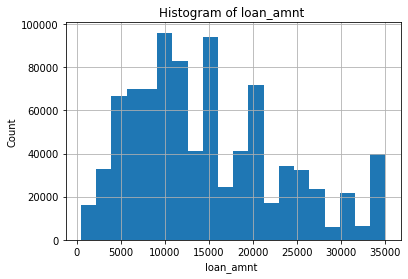

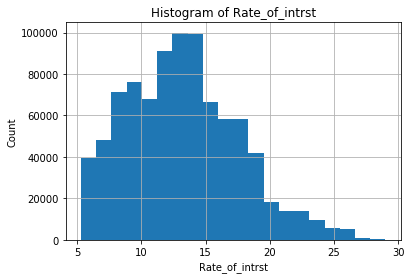

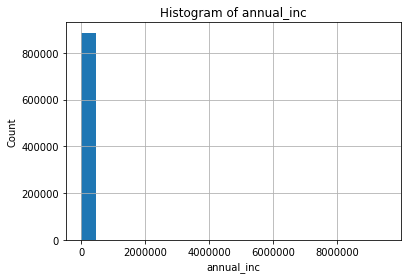

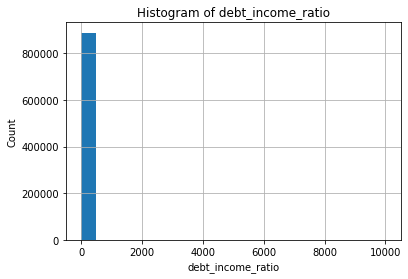

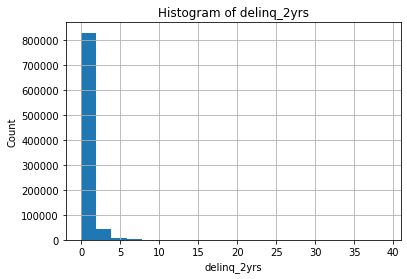

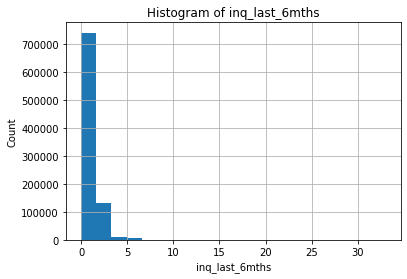

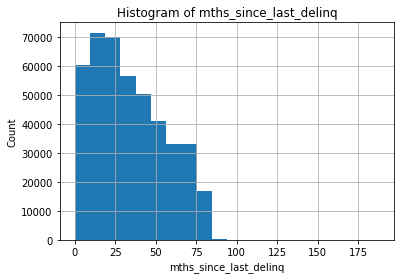

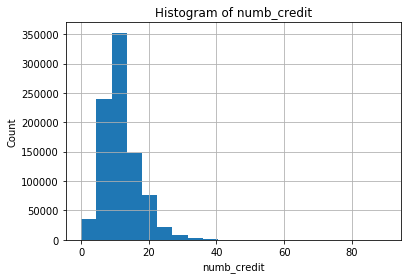

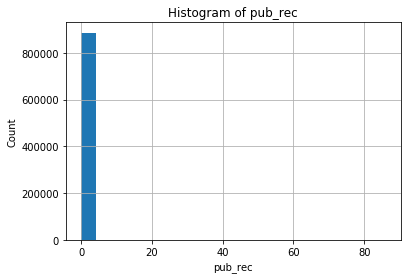

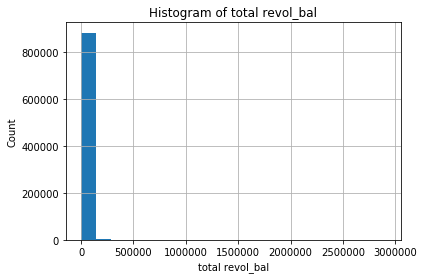

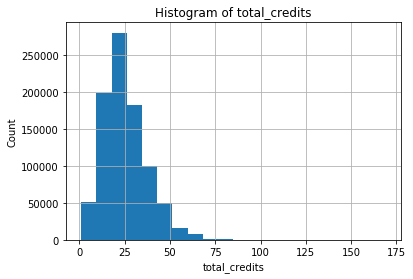

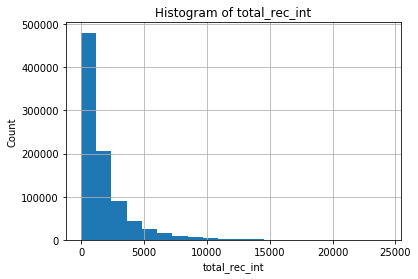

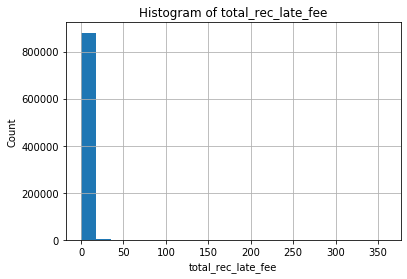

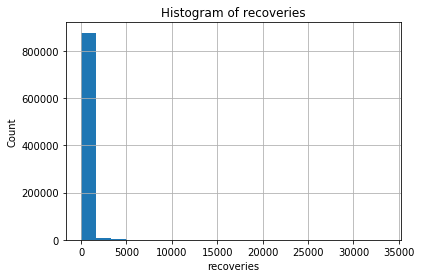

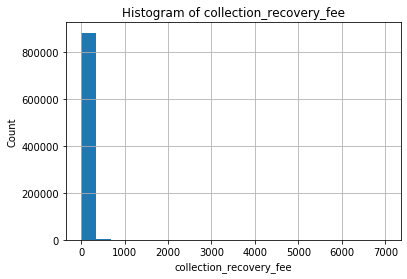

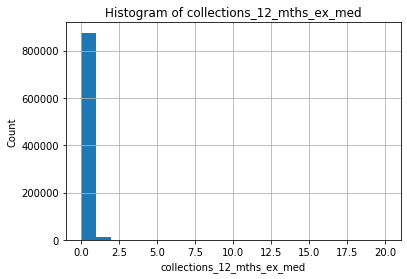

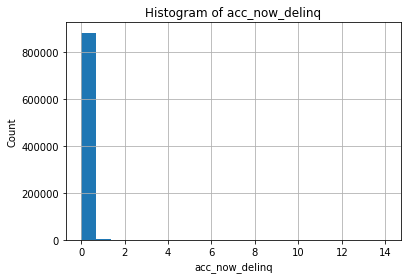

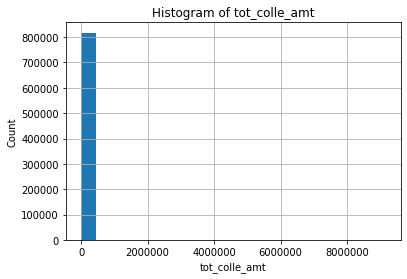

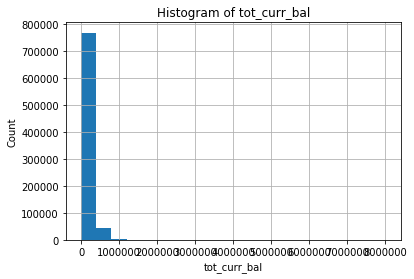

In [21]:
for feature in numerical_features:
    data = dataset.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title("Histogram of "+ feature)
    plt.show()

#### Distribtion of data in most of the variables in not normal or gaussian, they are skewwed.

In [22]:
# Using the boxplots to identify the outliers in the dataset

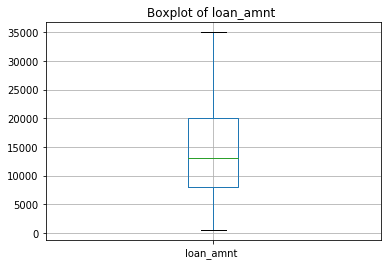

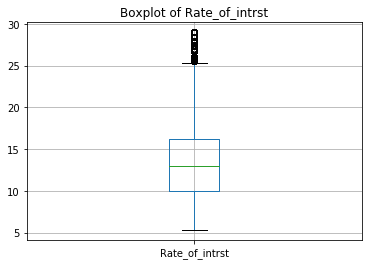

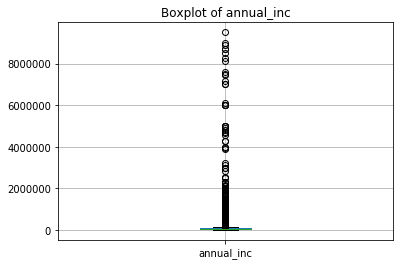

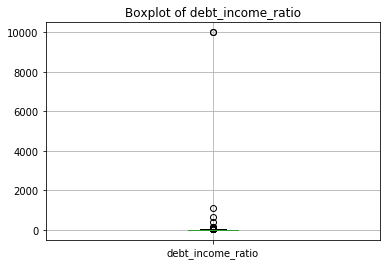

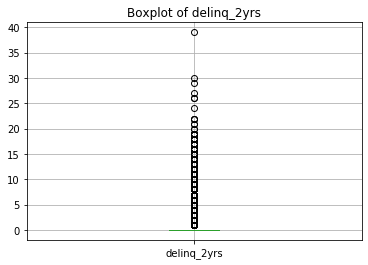

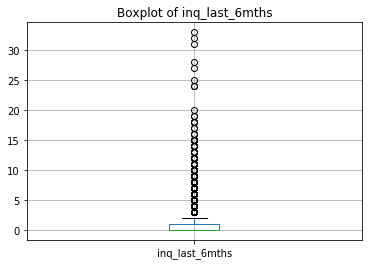

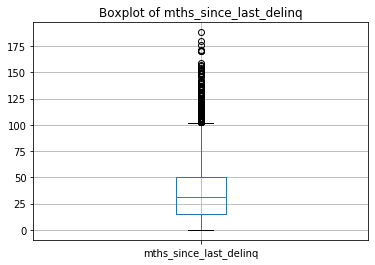

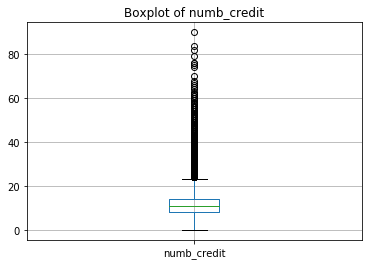

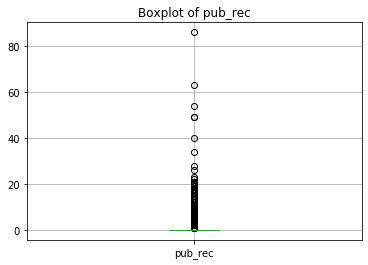

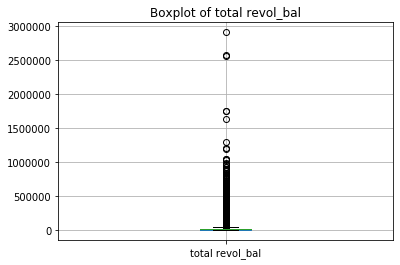

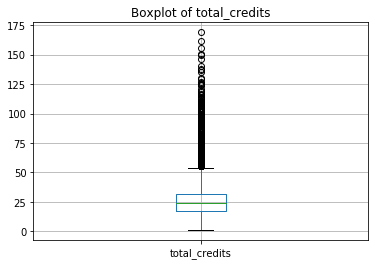

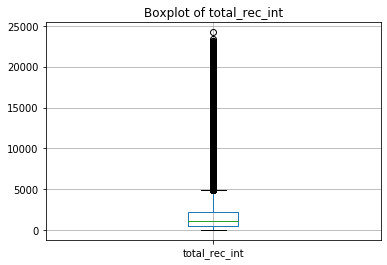

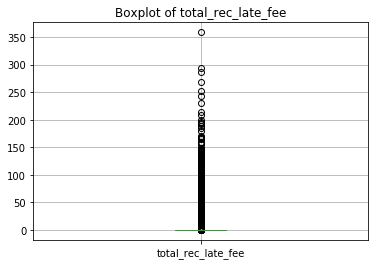

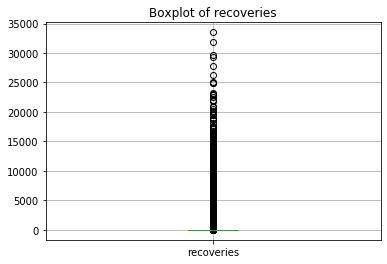

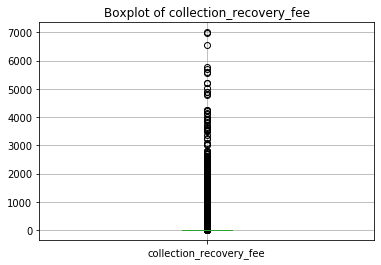

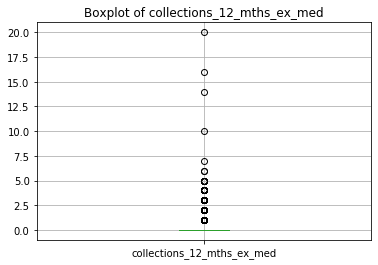

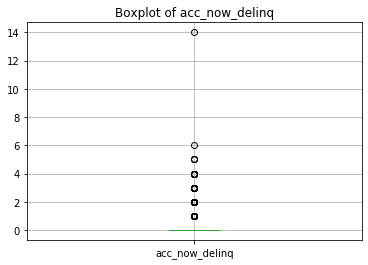

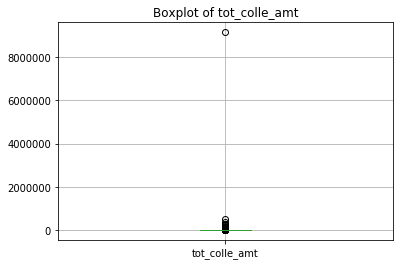

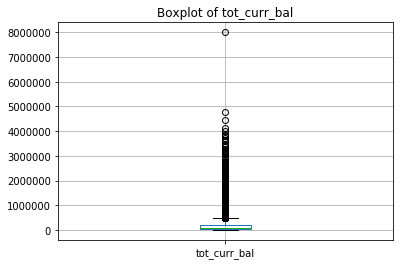

In [23]:
for feature in numerical_features:
    data = dataset.copy()
    data.boxplot(column=feature)
    plt.title("Boxplot of "+ feature)
    plt.show()

#### The boxplot of many variables shows a lot of outliers in the data. These outliers need to be handled to reduce thier impact on the analysis.

### Bivariate analysis

In [24]:
# Using scatter plots to represent indepedent numerical variables with the output variable 

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


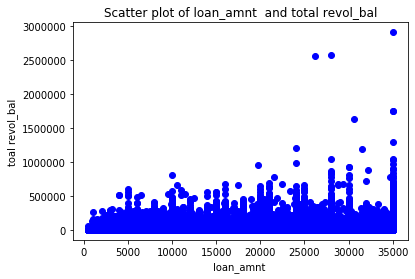

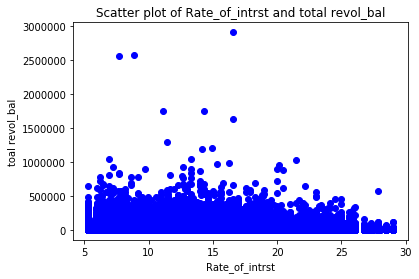

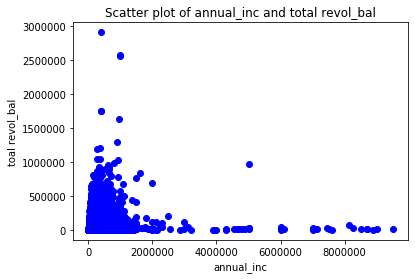

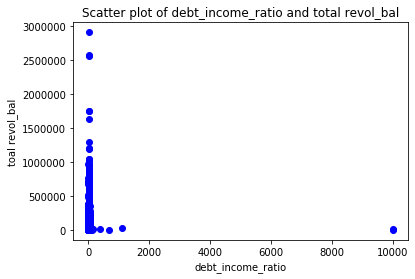

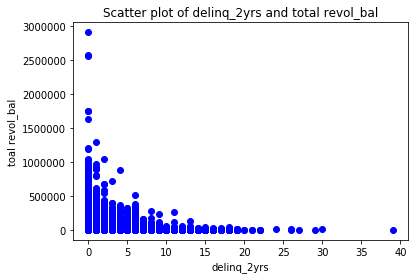

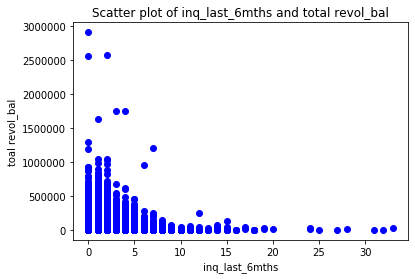

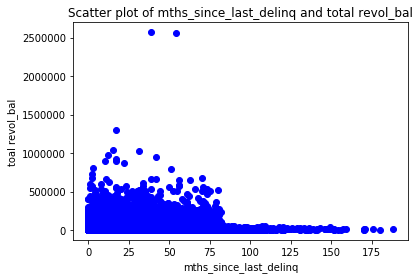

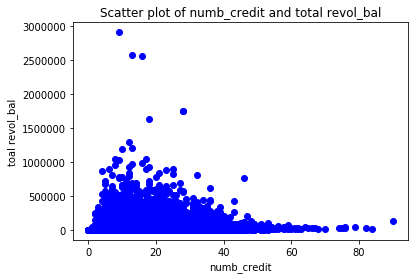

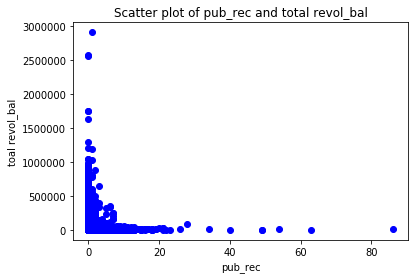

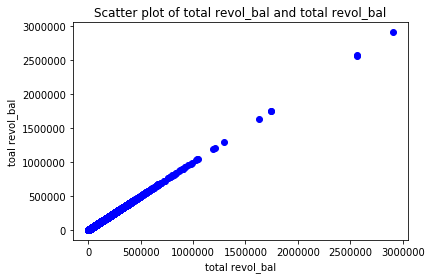

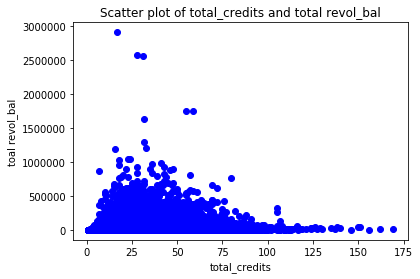

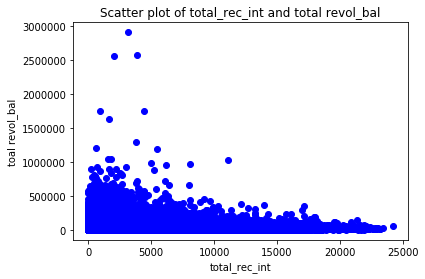

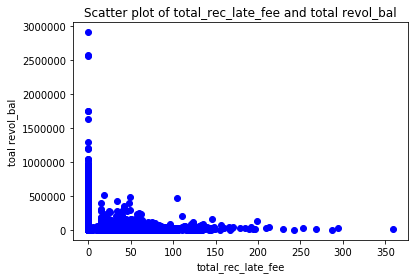

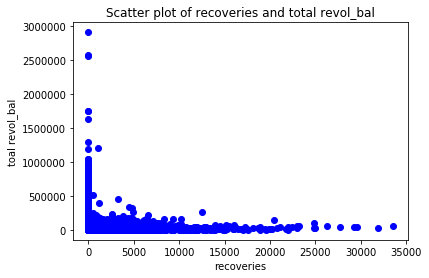

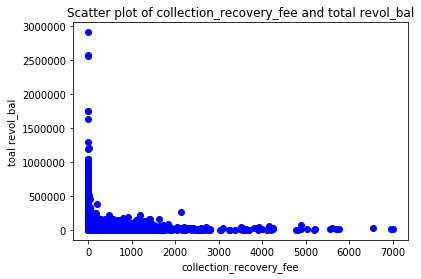

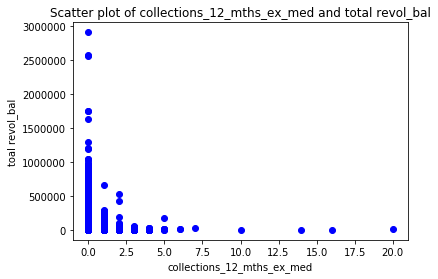

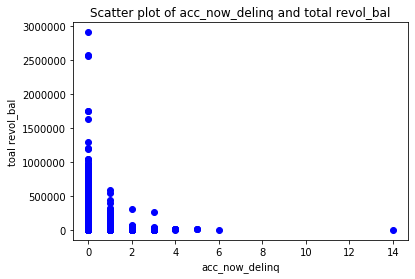

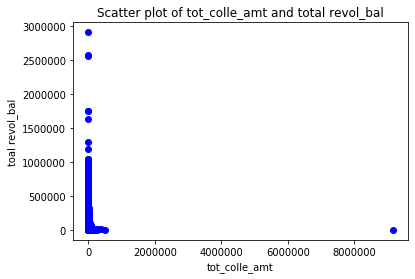

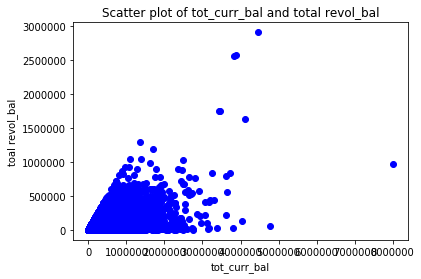

In [25]:
for feature in numerical_features:
    data = dataset.copy()
    plt.plot(data[feature], data["total revol_bal"], "bo")
    plt.xlabel(feature)
    plt.ylabel("toal revol_bal")
    plt.title("Scatter plot of "+ feature+ " and total revol_bal")
    plt.show()

#### Some scatter plots are showing good correlation with the output variable and the other scatterplots are not showing any significant relationship with output variable

### Categorical variables

In [26]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == "O"]
print("Number of categorical variables :", len(categorical_features))

Number of categorical variables : 12


In [27]:
dataset[categorical_features].head()

,terms,grade,sub_grade,Emp_designation,Experience,home_ownership,verification_status,purpose,State,initial_list_status,application_type,last_week_pay
0,36 months,E,E3,clerk,9 years,OWN,Source Verified,debt_consolidation,FL,f,INDIVIDUAL,26th week
1,36 months,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,Source Verified,home_improvement,MD,w,INDIVIDUAL,9th week
2,36 months,A,A4,Driver,2 years,OWN,Not Verified,debt_consolidation,OH,w,INDIVIDUAL,9th week
3,36 months,D,D5,Us office of Personnel Management,10+ years,RENT,Not Verified,debt_consolidation,VA,f,INDIVIDUAL,135th week
4,36 months,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,Verified,credit_card,CA,w,INDIVIDUAL,96th week


In [28]:
# Checking the number of unique values in each variable

In [29]:
dataset[categorical_features].nunique()

terms                       2
grade                       7
sub_grade                  35
Emp_designation        289207
Experience                 11
home_ownership              6
verification_status         3
purpose                    14
State                      51
initial_list_status         2
application_type            2
last_week_pay              98
dtype: int64

### Univariate analysis of categorical variables

In [30]:
# Using countplots see the frequencies of each categotical values

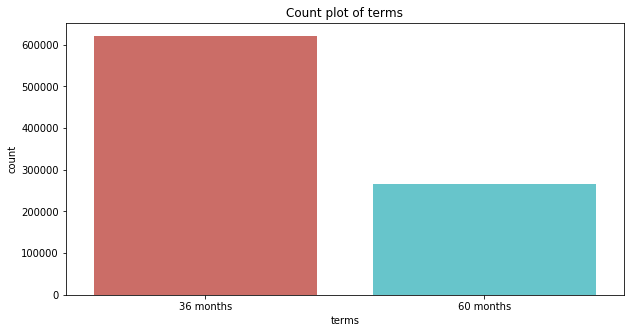

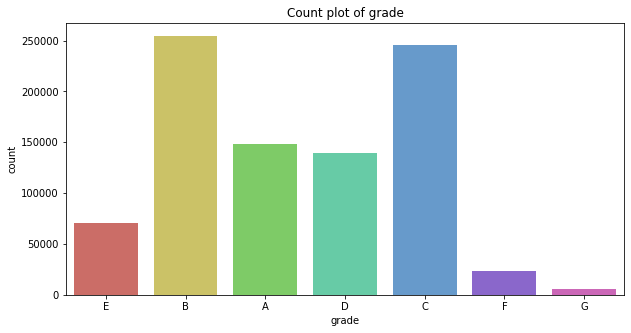

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

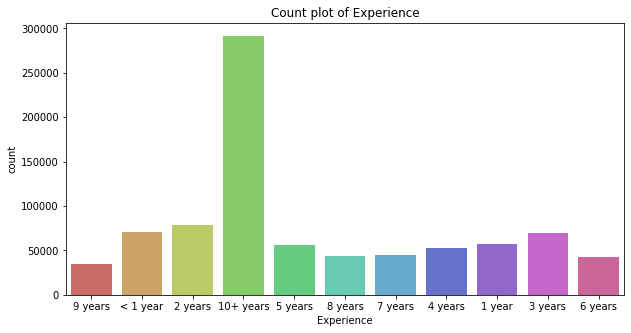

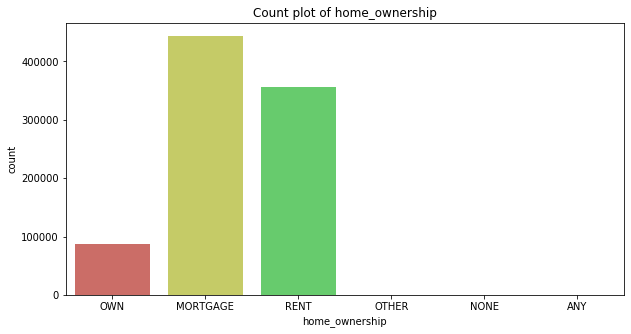

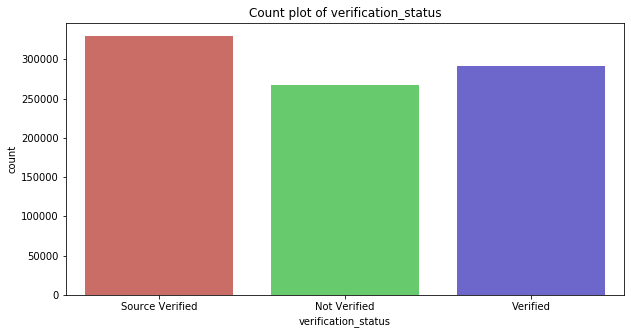

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

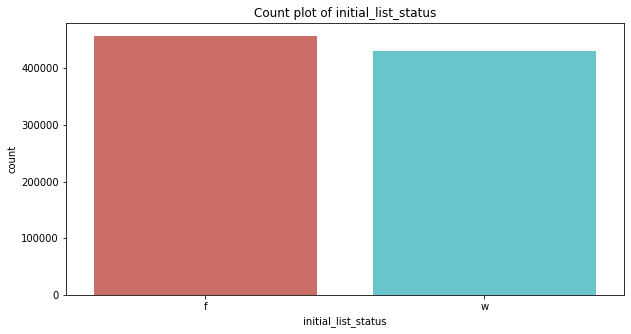

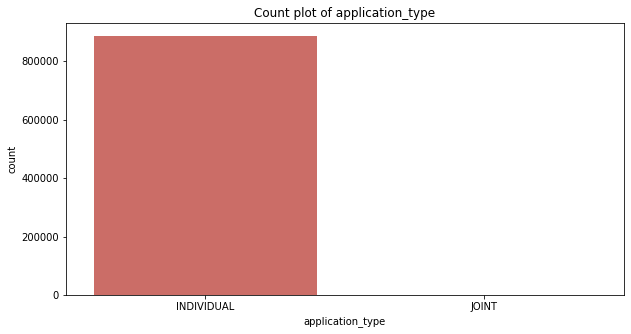

<Figure size 720x360 with 0 Axes>

In [31]:
for feature in categorical_features:
    plt.figure(figsize = (10,5))
    data = dataset.copy()
    if data[feature].nunique() < 12:
        sns.countplot(feature, data = data, palette = 'hls')
        plt.title("Count plot of " + feature)
        plt.show()

### Bivariate analysis of categorical variables

In [32]:
# Plotting categorical values with the output variable to check variation

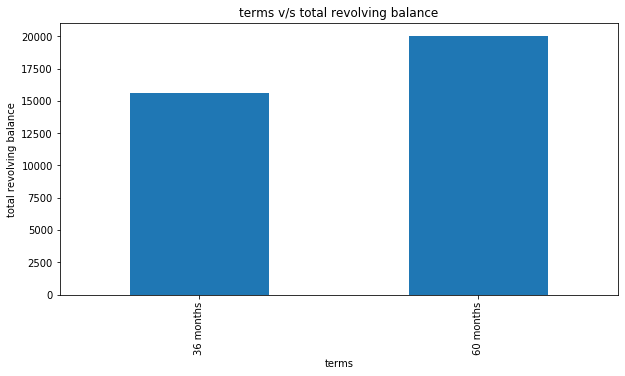

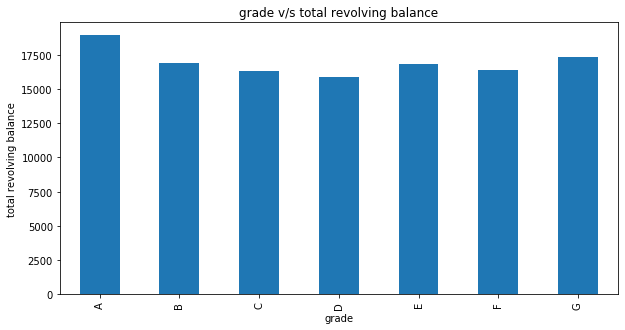

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

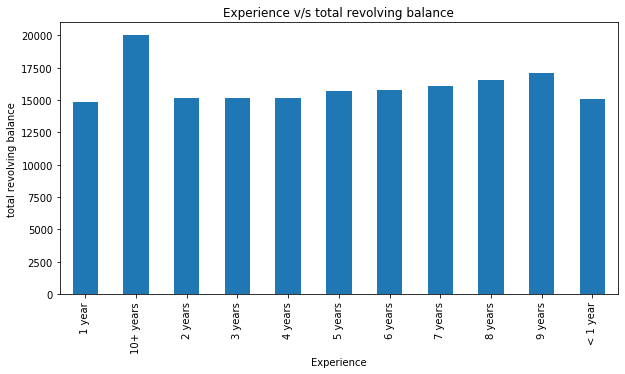

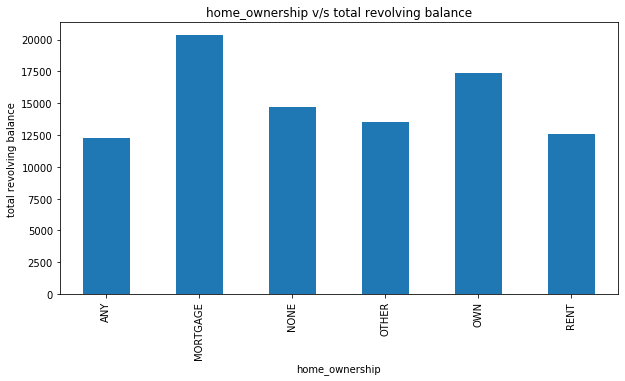

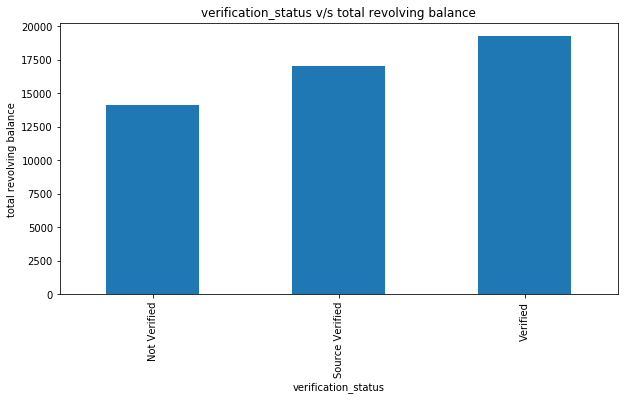

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

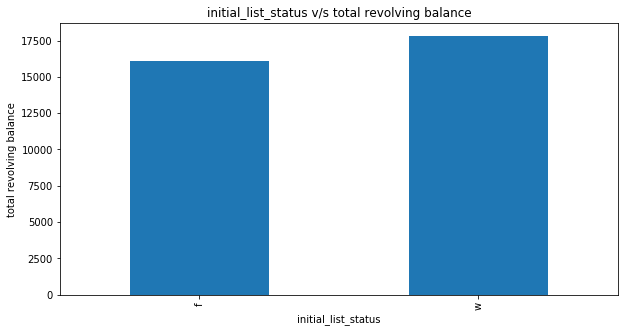

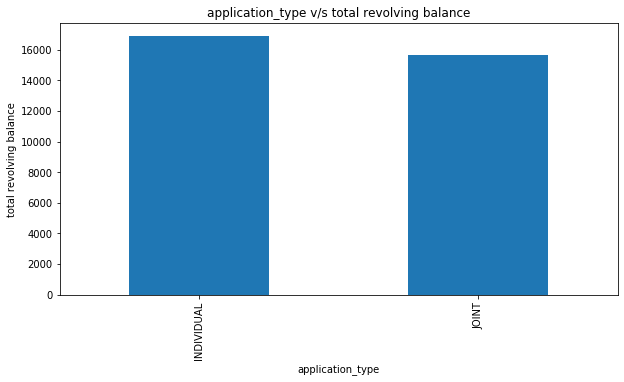

<Figure size 720x360 with 0 Axes>

In [33]:
for feature in categorical_features:
    data = dataset.copy()
    plt.figure(figsize= (10, 5))
    if data[feature].nunique() < 12:
        data.groupby(feature)["total revol_bal"].mean().plot.bar()
        plt.xlabel(feature)
        plt.ylabel("total revolving balance")
        plt.title(feature+" v/s total revolving balance")
        plt.show()

#### Some of the categorical variables like 'term', 'home_ownership' and 'verification status' shows significant changes with the putput variable

## Feature Engineering

### Correlation matrix using heatmap

In [36]:
correlation = dataset.corr()

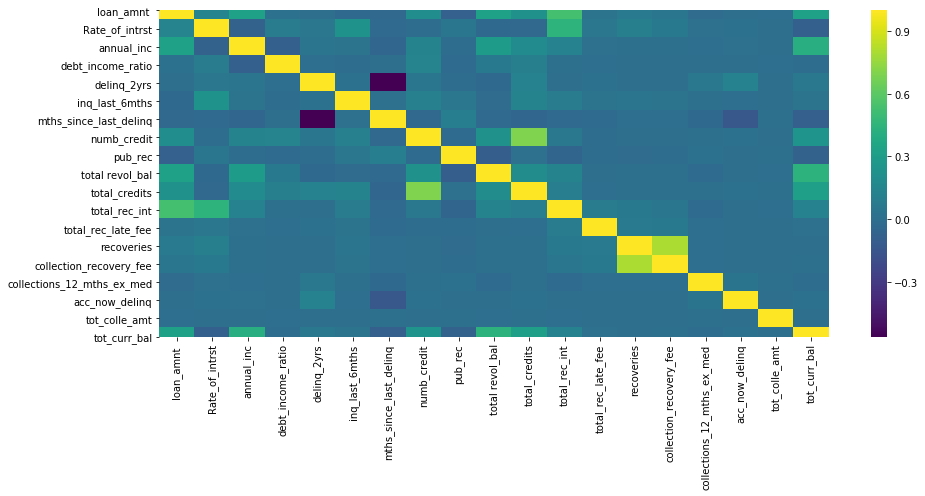

In [37]:
plt.figure(figsize = (15,6))
sns.heatmap(correlation, cbar = True, cmap = "viridis")

In [38]:
dataset["recoveries"].corr(dataset["collection_recovery_fee"])

0.8024196077109375

In [39]:
dataset["numb_credit"].corr(dataset["total_credits"])

0.6950752378121778

#### The variables "collection_recovery_fee" and "total_credits" from the dataset have high correlation with "recoveries" and "numb_credit" respectively. Hence the "collection_recovery_fee" and "total_credits" variables are dropped

In [40]:
dataset =dataset.drop(columns = ["collection_recovery_fee","total_credits"],axis=1 )

In [48]:
dataset.shape

(887379, 29)

In [49]:
dataset.columns

Index(['loan_amnt ', 'terms', 'Rate_of_intrst', 'grade', 'sub_grade',
       'Emp_designation', 'Experience', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'State', 'debt_income_ratio',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'numb_credit', 'pub_rec', 'total revol_bal', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'application_type', 'last_week_pay',
       'acc_now_delinq', 'tot_colle_amt', 'tot_curr_bal'],
      dtype='object')

### Handling missing values

In [50]:
for feature in dataset:
    if dataset[feature].isna().sum() > 1:
        print(feature,"-", dataset[feature].isna().sum())

collections_12_mths_ex_med - 145
acc_now_delinq - 29
tot_colle_amt - 70276
tot_curr_bal - 70276


#### Missing values are handled by imputing them with most frequent values for categorical data and median value for numerical data

In [43]:
# Categorical variables missing values imputation

In [44]:
dataset["Emp_designation"].fillna("No designation", inplace = True)

In [45]:
dataset["Experience"].fillna("0 years", inplace = True)

In [46]:
# Numerical variables missing values imputation

In [52]:
for feature in dataset:
    if dataset[feature].isna().sum() > 1:
        dataset[feature].fillna(dataset[feature].median(), inplace = True)

In [53]:
dataset.isna().sum()

loan_amnt                     0
terms                         0
Rate_of_intrst                0
grade                         0
sub_grade                     0
Emp_designation               0
Experience                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
State                         0
debt_income_ratio             0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
numb_credit                   0
pub_rec                       0
total revol_bal               0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collections_12_mths_ex_med    0
application_type              0
last_week_pay                 0
acc_now_delinq                0
tot_colle_amt                 0
tot_curr_bal                  0
dtype: int64

In [54]:
# All the missing values have been imputed

### Handling the categorical variables

In [55]:
dataset[categorical_features].nunique()

terms                       2
grade                       7
sub_grade                  35
Emp_designation        289208
Experience                 12
home_ownership              6
verification_status         3
purpose                    14
State                      51
initial_list_status         2
application_type            2
last_week_pay              98
dtype: int64

#### Since the unique values in the Emp_designation is very high, its very difficult to encode all these categories. Hence its can be dropped.

In [56]:
# Checking the importance of 'grade' variable

In [57]:
dataset.groupby('grade').median()

,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,numb_credit,pub_rec,total revol_bal,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal
grade,,,,,,,,,,,,,,,,,
A,12000,7.26,75000.0,15.080,0.0,0.0,31.0,11.0,0.0,12866.0,602.775,0.0,0.0,0.0,0.0,0.0,101383.0
B,12000,10.99,65000.0,16.860,0.0,0.0,31.0,10.0,0.0,11879.0,919.720,0.0,0.0,0.0,0.0,0.0,80559.0
C,12000,13.99,60000.0,18.350,0.0,0.0,31.0,11.0,0.0,11563.0,1155.380,0.0,0.0,0.0,0.0,0.0,80559.0
D,14000,16.99,60000.0,19.450,0.0,1.0,31.0,11.0,0.0,11304.0,1602.780,0.0,0.0,0.0,0.0,0.0,76729.5
E,16850,19.99,61000.0,20.050,0.0,1.0,31.0,11.0,0.0,12155.0,2065.040,0.0,0.0,0.0,0.0,0.0,80559.0
F,18625,23.76,65000.0,19.695,0.0,1.0,31.0,11.0,0.0,12022.5,2838.740,0.0,0.0,0.0,0.0,0.0,80559.0
G,20000,25.83,68000.0,19.280,0.0,1.0,31.0,11.0,0.0,11553.0,3705.820,0.0,0.0,0.0,0.0,0.0,80559.0


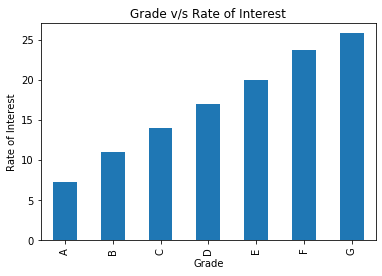

In [58]:
dataset.groupby('grade')['Rate_of_intrst'].median().plot.bar()
plt.xlabel("Grade")
plt.ylabel("Rate of Interest")
plt.title("Grade v/s Rate of Interest")
plt.show()

#### It is clear that the grade is completely based on the rate of interest and the subgrade is also based on grade. Hence because of this high correlation both 'grade' and 'subgrade' can be dropped.

In [59]:
# Checking the importance of 'State'

Text(0, 0.5, 'total revol_bal')

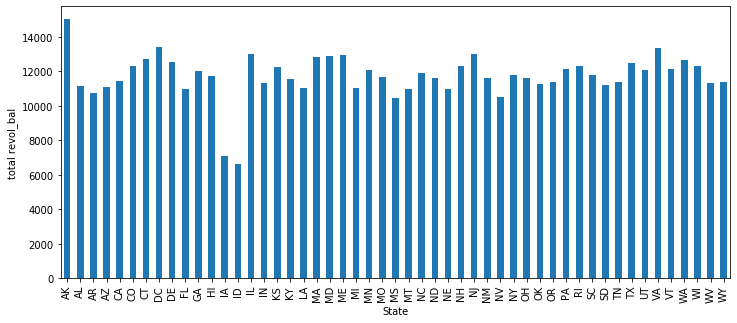

In [60]:
plt.figure(figsize=(12,5))
dataset.groupby('State')['total revol_bal'].median().plot.bar(); plt.xlabel('State'); plt.ylabel('total revol_bal')

#### Since there is no significant changes in the output with different states. The 'states' column can be dropped.

In [61]:
# Checking the importance of 'last_week_pay'

Text(0, 0.5, 'total revol_bal')

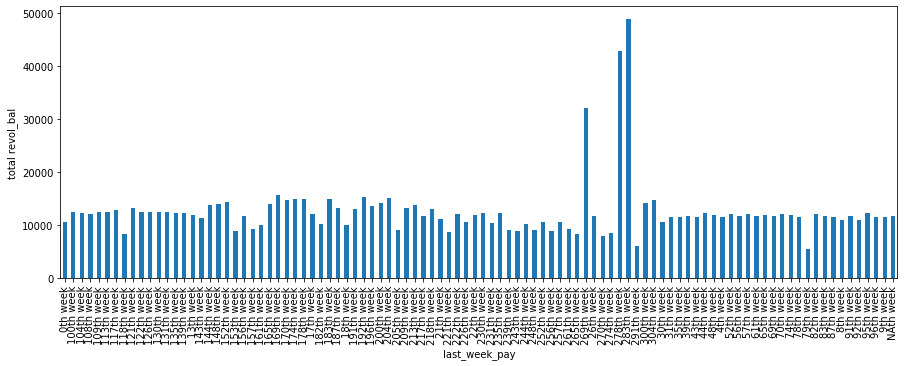

In [62]:
plt.figure(figsize=(15,5))
dataset.groupby('last_week_pay')['total revol_bal'].median().plot.bar(); plt.xlabel('last_week_pay'); plt.ylabel('total revol_bal')

#### There is some significant changes in the output variable with the last_week_pay, hence the variable is considered in the analysis.

In [63]:
# Dropping the unwanted columns

In [64]:
dataset = dataset.drop(columns=["grade","sub_grade","Emp_designation","State"],axis=1)

In [65]:
dataset.shape

(887379, 25)

### Encoding of categorial variables

In [66]:
# Converting the experience variable from object type to integer type by extracting only numbers

In [67]:
def split_num(my_str):
    num = [x for x in my_str if x.isdigit()]
    num = "".join(num)

    if not num:
        num = None

    return num

In [68]:
Exp = []
for i in dataset["Experience"]:
    exp = split_num(i)
    Exp.append(exp)
Exp = pd.to_numeric(Exp)

In [69]:
# Converting the 'last week pay' variable from object type to integer type by extracting only numbers

In [70]:
Pay = []
for i in dataset["last_week_pay"]:
    pay = split_num(i)
    Pay.append(pay)
Pay = pd.to_numeric(Pay)

In [71]:
dataset["Experience"] = Exp
dataset["last_week_pay"] = Pay

In [72]:
dataset.head()

,loan_amnt,terms,Rate_of_intrst,Experience,home_ownership,annual_inc,verification_status,purpose,debt_income_ratio,delinq_2yrs,...,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,14350,36 months,19.19,9,OWN,28700.0,Source Verified,debt_consolidation,33.88,0.0,...,f,1173.84,0.0,0.0,0.0,INDIVIDUAL,26.0,0.0,0.0,28699.0
1,4800,36 months,10.99,1,MORTGAGE,65000.0,Source Verified,home_improvement,3.64,0.0,...,w,83.95,0.0,0.0,0.0,INDIVIDUAL,9.0,0.0,0.0,9974.0
2,10000,36 months,7.26,2,OWN,45000.0,Not Verified,debt_consolidation,18.42,0.0,...,w,56.47,0.0,0.0,0.0,INDIVIDUAL,9.0,0.0,65.0,38295.0
3,15000,36 months,19.72,10,RENT,105000.0,Not Verified,debt_consolidation,14.97,0.0,...,f,4858.62,0.0,0.0,0.0,INDIVIDUAL,135.0,0.0,0.0,55564.0
4,16000,36 months,10.64,10,RENT,52000.0,Verified,credit_card,20.16,0.0,...,w,2296.41,0.0,0.0,0.0,INDIVIDUAL,96.0,0.0,0.0,47159.0


In [73]:
dataset["last_week_pay"]= dataset["last_week_pay"].fillna(dataset["last_week_pay"].median())

In [74]:
# Encoding other categorical variables

In [75]:
dataset = pd.get_dummies(dataset, columns =['terms','home_ownership','verification_status','purpose','initial_list_status','application_type'],drop_first=True)

In [76]:
dataset.head()

,loan_amnt,Rate_of_intrst,Experience,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,numb_credit,pub_rec,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT
0,14350,19.19,9,28700.0,33.88,0.0,1.0,50.0,14.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,4800,10.99,1,65000.0,3.64,0.0,1.0,31.0,6.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10000,7.26,2,45000.0,18.42,0.0,0.0,31.0,5.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,15000,19.72,10,105000.0,14.97,0.0,2.0,46.0,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,16000,10.64,10,52000.0,20.16,0.0,0.0,31.0,11.0,0.0,...,0,0,0,0,0,0,0,0,1,0


### Handling the outliers

In [77]:
# Quantile calculations

In [78]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

In [79]:
# Number of extreme outliers in each variable

In [80]:
((dataset < (Q1 - 3 * IQR)) | (dataset > (Q3 + 3 * IQR))).sum()

loan_amnt                                   0
Rate_of_intrst                              0
Experience                                  0
annual_inc                              12122
debt_income_ratio                          29
delinq_2yrs                            170389
inq_last_6mths                           5678
mths_since_last_delinq                 426719
numb_credit                              3494
pub_rec                                135778
total revol_bal                         18428
total_rec_int                           23467
total_rec_late_fee                      12517
recoveries                              24677
collections_12_mths_ex_med              11681
last_week_pay                              28
acc_now_delinq                           4114
tot_colle_amt                          116157
tot_curr_bal                             6965
terms_60 months                             0
home_ownership_MORTGAGE                     0
home_ownership_NONE               

#### Since there are lot of outliers in many variables, it is not feasible to drop so many outliers directly

In [88]:
# Checking the skewness of numerical variables

In [87]:
dataset.skew()

loan_amnt                                0.681683
Rate_of_intrst                           0.429481
Experience                              -0.116767
annual_inc                              44.478582
debt_income_ratio                      441.486775
delinq_2yrs                              5.473884
inq_last_6mths                           2.108453
mths_since_last_delinq                   0.945627
numb_credit                              1.249410
pub_rec                                 13.262116
total revol_bal                         15.949302
total_rec_int                            2.826100
total_rec_late_fee                      17.404085
recoveries                              18.061839
collections_12_mths_ex_med              17.411826
last_week_pay                            1.040209
acc_now_delinq                          24.066751
tot_colle_amt                          892.194172
tot_curr_bal                             3.078201
terms_60 months                          0.872637


In [91]:
# Getting the columns the with skewness value of more than 3

In [92]:
features_skew =[features for features in dataset.columns if dataset[features].skew() > 3]

In [94]:
df_skew = [] 
for feature in features_skew:
    skew = feature
    print(feature,"-", "%.2f" % dataset[feature].skew())
    df_skew.append(skew)

annual_inc - 44.48
debt_income_ratio - 441.49
delinq_2yrs - 5.47
pub_rec - 13.26
total revol_bal - 15.95
total_rec_late_fee - 17.40
recoveries - 18.06
collections_12_mths_ex_med - 17.41
acc_now_delinq - 24.07
tot_colle_amt - 892.19
tot_curr_bal - 3.08
home_ownership_NONE - 133.21
home_ownership_OTHER - 69.80
purpose_educational - 45.77
purpose_home_improvement - 3.77
purpose_house - 15.37
purpose_major_purchase - 6.96
purpose_medical - 10.05
purpose_moving - 12.69
purpose_other - 4.21
purpose_renewable_energy - 39.25
purpose_small_business - 9.08
purpose_vacation - 13.58
purpose_wedding - 19.37
application_type_JOINT - 41.64


#### The skewness value of above variables is very high, hence they have to be handled carefully

### Getting the upper boundary and lower boundary for each feature

In [107]:
df = dataset

In [108]:
for feature in df_skew:
    IQR = df[feature].quantile(0.75)-df[feature].quantile(0.25)
    lower_bridge=df[feature].quantile(0.25)-(IQR*3)
    upper_bridge=df[feature].quantile(0.75)+(IQR*3)
    print(feature, lower_bridge), print(feature,upper_bridge)

annual_inc -90000.0
annual_inc 225000.0
debt_income_ratio -24.209999999999997
debt_income_ratio 60.06999999999999
tot_curr_bal -458398.0
tot_curr_bal 686438.0
tot_curr_bal -458398.0
tot_curr_bal 686438.0
total_rec_int -4948.955000000001
total_rec_int 7628.680000000001
inq_last_6mths -3.0
inq_last_6mths 4.0
annual_inc -90000.0
annual_inc 225000.0
numb_credit -10.0
numb_credit 32.0


In [109]:
# Removing the features 'delinq_2yrs', 'pub_rec', 'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_colle_amt' as their upper boundary is zero

In [110]:
df_skew = ['annual_inc', 'debt_income_ratio', 'tot_curr_bal','tot_curr_bal', 'total_rec_int', 'inq_last_6mths','annual_inc', 'numb_credit']

In [111]:
for feature in df_skew:
    IQR = df[feature].quantile(0.75)-df[feature].quantile(0.25)
    lower_bridge=df[feature].quantile(0.25)-(IQR*3)
    upper_bridge=df[feature].quantile(0.75)+(IQR*3)
    df.loc[df[feature]>=upper_bridge,feature]=upper_bridge

In [112]:
# Skewness after outlier imputation

In [113]:
df[df_skew].skew()

annual_inc           1.531090
debt_income_ratio    0.232368
tot_curr_bal         1.637971
tot_curr_bal         1.637971
total_rec_int        1.741421
inq_last_6mths       1.476876
annual_inc           1.531090
numb_credit          1.034261
dtype: float64

#### The skewness values have considerably reduced in all the features

In [114]:
# Seperating numerical and categorical variables from the data

In [115]:
df_cat = df[['terms_60 months',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_JOINT']]

In [116]:
df_num = df[['loan_amnt ', 'Rate_of_intrst', 'Experience', 'annual_inc','mths_since_last_delinq',
       'debt_income_ratio', 'delinq_2yrs','last_week_pay', 'inq_last_6mths', 'numb_credit',
       'pub_rec', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_colle_amt', 'tot_curr_bal']]

In [117]:
# Output variable

In [118]:
df_out = df['total revol_bal']

In [119]:
# Combining numerical, categorical and output variables into one dataframe

In [120]:
final_df = pd.concat([df_num, df_cat, df_out], axis=1)

In [121]:
final_df.head()

,loan_amnt,Rate_of_intrst,Experience,annual_inc,mths_since_last_delinq,debt_income_ratio,delinq_2yrs,last_week_pay,inq_last_6mths,numb_credit,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT,total revol_bal
0,14350,19.19,9,28700.0,50.0,33.88,0.0,26.0,1.0,14.0,...,0,0,0,0,0,0,0,0,0,22515.0
1,4800,10.99,1,65000.0,31.0,3.64,0.0,9.0,1.0,6.0,...,0,0,0,0,0,0,0,1,0,7624.0
2,10000,7.26,2,45000.0,31.0,18.42,0.0,9.0,0.0,5.0,...,0,0,0,0,0,0,0,1,0,10877.0
3,15000,19.72,10,105000.0,46.0,14.97,0.0,135.0,2.0,10.0,...,0,0,0,0,0,0,0,0,0,13712.0
4,16000,10.64,10,52000.0,31.0,20.16,0.0,96.0,0.0,11.0,...,0,0,0,0,0,0,0,1,0,35835.0


In [124]:
# Saving the final clean dataframe 

In [125]:
final_df.to_csv('Project_final_cleandata_eda.csv') 

## Feature selection

In [126]:
df = pd.read_csv("Project_final_cleandata_eda.csv")
df.head()

,Unnamed: 0,loan_amnt,Rate_of_intrst,Experience,annual_inc,mths_since_last_delinq,debt_income_ratio,delinq_2yrs,last_week_pay,inq_last_6mths,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT,total revol_bal
0,0,14350,19.19,9,28700.0,50.0,33.88,0.0,26.0,1.0,...,0,0,0,0,0,0,0,0,0,22515.0
1,1,4800,10.99,1,65000.0,31.0,3.64,0.0,9.0,1.0,...,0,0,0,0,0,0,0,1,0,7624.0
2,2,10000,7.26,2,45000.0,31.0,18.42,0.0,9.0,0.0,...,0,0,0,0,0,0,0,1,0,10877.0
3,3,15000,19.72,10,105000.0,46.0,14.97,0.0,135.0,2.0,...,0,0,0,0,0,0,0,0,0,13712.0
4,4,16000,10.64,10,52000.0,31.0,20.16,0.0,96.0,0.0,...,0,0,0,0,0,0,0,1,0,35835.0


In [127]:
feature_scale=[feature for feature in df.columns if feature not in ["total revol_bal","Unnamed: 0"]]

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [130]:
scaled_data = pd.DataFrame(scaler.transform(df[feature_scale]),columns=feature_scale)

In [131]:
# Adding output variable to scaled data

In [132]:
scaled_data["total revol_bal"] = df["total revol_bal"]

In [133]:
scaled_data.head()

,loan_amnt,Rate_of_intrst,Experience,annual_inc,mths_since_last_delinq,debt_income_ratio,delinq_2yrs,last_week_pay,inq_last_6mths,numb_credit,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT,total revol_bal
0,0.401449,0.585974,0.9,0.127556,0.265957,0.564009,0.0,0.085526,0.25,0.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22515.0
1,0.124638,0.239544,0.1,0.288889,0.164894,0.060596,0.0,0.029605,0.25,0.18750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7624.0
2,0.275362,0.081960,0.2,0.200000,0.164894,0.306642,0.0,0.029605,0.00,0.15625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10877.0
3,0.420290,0.608365,1.0,0.466667,0.244681,0.249209,0.0,0.444079,0.50,0.31250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13712.0
4,0.449275,0.224757,1.0,0.231111,0.164894,0.335608,0.0,0.315789,0.00,0.34375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35835.0


In [134]:
# Seperating input and output variables

In [135]:
X = scaled_data.drop(columns=["total revol_bal"],axis=1)
y = scaled_data["total revol_bal"]

### Using OLS model to check p-values

In [136]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [137]:
est = sm.OLS(y, X).fit()

In [138]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        total revol_bal   R-squared (uncentered):                   0.527
Model:                            OLS   Adj. R-squared (uncentered):              0.527
Method:                 Least Squares   F-statistic:                          2.409e+04
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                        0.00
Time:                        16:28:57   Log-Likelihood:                     -1.0017e+07
No. Observations:              887379   AIC:                                  2.003e+07
Df Residuals:                  887338   BIC:                                  2.003e+07
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
loan_amnt                            1.443e+04    140.817    102.503      0.000    1.42e+04    1.47e+04
Rate_of_intrst                       -297.9759    156.932     -1.899      0.058    -605.557       9.605
Experience                           1373.8613     57.166     24.033      0.000    1261.817    1485.905
annual_inc                           2.909e+04    163.382    178.062      0.000    2.88e+04    2.94e+04
mths_since_last_delinq              -7797.0069    287.833    -27.089      0.000   -8361.151   -7232.863
debt_income_ratio                    2.708e+04    171.250    158.157      0.000    2.67e+04    2.74e+04
delinq_2yrs                         -7.304e+04   1070.379    -68.240      0.000   -7.51e+04   -7.09e+04
last_week_pay                        6204.4252    219.910     28.213      0.000    5773.409    6635.441
inq_last_6mths                      -2170.8703     91.724    -23.667      0.000   -2350.646   -1991.094
numb_credit                          7388.8032    141.863     52.084      0.000    7110.756    7666.850
pub_rec                             -1.825e+05   3097.112    -58.936      0.000   -1.89e+05   -1.76e+05
total_rec_int                       -3434.0183    178.114    -19.280      0.000   -3783.116   -3084.921
total_rec_late_fee                  -6477.7429   1815.474     -3.568      0.000      -1e+04   -2919.475
recoveries                           2238.1322   1701.401      1.315      0.188   -1096.557    5572.822
collections_12_mths_ex_med          -3.838e+04   3071.201    -12.496      0.000   -4.44e+04   -3.24e+04
acc_now_delinq                      -2.421e+04   3748.987     -6.458      0.000   -3.16e+04   -1.69e+04
tot_colle_amt                       -8.691e+04    1.9e+04     -4.579      0.000   -1.24e+05   -4.97e+04
tot_curr_bal                         2.361e+04    142.552    165.611      0.000    2.33e+04    2.39e+04
terms_60 months                     -1286.6573     56.049    -22.956      0.000   -1396.510   -1176.804
home_ownership_MORTGAGE             -1.279e+04    239.226    -53.468      0.000   -1.33e+04   -1.23e+04
home_ownership_NONE                 -1.348e+04   2744.369     -4.912      0.000   -1.89e+04   -8102.687
home_ownership_OTHER                -1.028e+04   1453.033     -7.075      0.000   -1.31e+04   -7432.213
home_ownership_OWN                  -9766.5276    244.116    -40.008      0.000   -1.02e+04   -9288.069
home_ownership_RENT                 -1.157e+04    237.202    -48.775      0.000    -1.2e+04   -1.11e+04
verification_status_Source Verified    95.4596     52.480      1.819      0.069      -7.400     198.319
verification_status_Verified          769.5145     55.962     13.751    

#### recoveries, verification_status_Source Verified, purpose_medical,purpose_other, purpose_renewable_energy,purpose_moving,purpose_vacation have p_values more than 0.05, hence they are insignificant

### Backward Elimination

In [139]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols

In [140]:
print(selected_features_BE)

['loan_amnt ', 'Experience', 'annual_inc', 'mths_since_last_delinq', 'debt_income_ratio', 'delinq_2yrs', 'last_week_pay', 'inq_last_6mths', 'numb_credit', 'pub_rec', 'total_rec_int', 'total_rec_late_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_colle_amt', 'tot_curr_bal', 'terms_60 months', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_small_business', 'purpose_wedding', 'initial_list_status_w', 'application_type_JOINT']


In [141]:
len(selected_features_BE)

30

### Lasso regression

In [142]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [143]:
feature_sel_model = SelectFromModel(Lasso(alpha=1, random_state=0)) 
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=1, random_state=0))

In [144]:
selected_feat = X.columns[(feature_sel_model.get_support())]

In [145]:
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 41
selected features: 31
features with coefficients shrank to zero: 10


In [146]:
# Columns which can be dropped

In [147]:
X.columns[feature_sel_model.estimator_.coef_ == 0]

Index(['total_rec_late_fee', 'recoveries', 'acc_now_delinq', 'tot_colle_amt',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_RENT',
       'purpose_moving', 'purpose_renewable_energy', 'purpose_vacation'],
      dtype='object')

In [148]:
From all the feature selection techniques it is difficult to tell which feature to be eliminated

SyntaxError: invalid syntax (<ipython-input-148-456e383d494e>, line 1)

In [149]:
final_df= scaled_data

In [150]:
final_df.head()

,loan_amnt,Rate_of_intrst,Experience,annual_inc,mths_since_last_delinq,debt_income_ratio,delinq_2yrs,last_week_pay,inq_last_6mths,numb_credit,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT,total revol_bal
0,0.401449,0.585974,0.9,0.127556,0.265957,0.564009,0.0,0.085526,0.25,0.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22515.0
1,0.124638,0.239544,0.1,0.288889,0.164894,0.060596,0.0,0.029605,0.25,0.18750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7624.0
2,0.275362,0.081960,0.2,0.200000,0.164894,0.306642,0.0,0.029605,0.00,0.15625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10877.0
3,0.420290,0.608365,1.0,0.466667,0.244681,0.249209,0.0,0.444079,0.50,0.31250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13712.0
4,0.449275,0.224757,1.0,0.231111,0.164894,0.335608,0.0,0.315789,0.00,0.34375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35835.0


### Using Random Forest regressor to find important features

In [151]:
from sklearn.ensemble import RandomForestRegressor 

In [152]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 

In [153]:
regressor.fit(X, y) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [154]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)

In [155]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]

In [156]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [157]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: tot_curr_bal         Importance: 0.19
Variable: debt_income_ratio    Importance: 0.14
Variable: loan_amnt            Importance: 0.11
Variable: annual_inc           Importance: 0.09
Variable: Rate_of_intrst       Importance: 0.06
Variable: numb_credit          Importance: 0.06
Variable: total_rec_int        Importance: 0.06
Variable: mths_since_last_delinq Importance: 0.05
Variable: Experience           Importance: 0.04
Variable: last_week_pay        Importance: 0.04
Variable: inq_last_6mths       Importance: 0.02
Variable: pub_rec              Importance: 0.02
Variable: delinq_2yrs          Importance: 0.01
Variable: tot_colle_amt        Importance: 0.01
Variable: terms_60 months      Importance: 0.01
Variable: home_ownership_MORTGAGE Importance: 0.01
Variable: home_ownership_OWN   Importance: 0.01
Variable: verification_status_Source Verified Importance: 0.01
Variable: verification_status_Verified Importance: 0.01
Variable: purpose_credit_card  Importance: 0.01
Variable: pu

#### Removing the variables which are not selected in other techniques and also having zero significance in feature importance

In [158]:
final_df.drop(columns=['collections_12_mths_ex_med', 'acc_now_delinq', 'application_type_JOINT'],axis=1, inplace=True)

In [159]:
final_df.shape

(887379, 39)

In [160]:
# saving the dataframe 
final_df.to_csv('Project_finaldata_fs.csv') 

In [161]:
## Model building

In [162]:
df = pd.read_csv("Project_finaldata_fs.csv")
df.head()

,Unnamed: 0,loan_amnt,Rate_of_intrst,Experience,annual_inc,mths_since_last_delinq,debt_income_ratio,delinq_2yrs,last_week_pay,inq_last_6mths,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,total revol_bal
0,0,0.401449,0.585974,0.9,0.127556,0.265957,0.564009,0.0,0.085526,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22515.0
1,1,0.124638,0.239544,0.1,0.288889,0.164894,0.060596,0.0,0.029605,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7624.0
2,2,0.275362,0.081960,0.2,0.200000,0.164894,0.306642,0.0,0.029605,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10877.0
3,3,0.420290,0.608365,1.0,0.466667,0.244681,0.249209,0.0,0.444079,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13712.0
4,4,0.449275,0.224757,1.0,0.231111,0.164894,0.335608,0.0,0.315789,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35835.0


In [163]:
df.drop(columns= ["Unnamed: 0"], axis=1, inplace=True)

In [164]:
df.shape

(887379, 39)

### Seperating input and output variables

In [165]:
X = df.drop(columns=["total revol_bal"],axis=1)
Y = df["total revol_bal"]

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
x_train, x_test,y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [168]:
### Linear regression

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
from sklearn import metrics

In [171]:
reg = LinearRegression()

In [172]:
model = reg.fit(x_train, y_train)

In [173]:
print('Intercept: ', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept:  -20148.97736211908
Coefficients: 
 [ 1.43766350e+04 -2.31381901e+02  1.42471688e+03  2.90433180e+04
 -7.19679607e+03  2.70307014e+04 -7.41221069e+04  6.10290822e+03
 -2.17684393e+03  7.34294358e+03 -1.80856863e+05 -3.40383309e+03
 -8.03279023e+03  8.68725430e+02 -2.22504978e+06  2.38560280e+04
 -1.33294072e+03  7.16490438e+03  7.93693923e+03  9.06518148e+03
  1.02574990e+04  8.43600308e+03  1.05859906e+02  7.85873518e+02
  2.36251883e+03 -5.37995823e+02  4.46339037e+03 -2.95919888e+03
 -3.00822730e+03 -1.82955923e+03  4.63377263e-01  1.60053439e+02
 -8.12610340e+01  1.52058505e+03 -7.78285885e+02 -1.98312712e+02
 -1.40860519e+03 -2.30589979e+02]


In [174]:
# predicting trained values

In [175]:
y_pred1 = model.predict(x_train)

In [176]:
# predicting test values

In [177]:
y_pred2 = model.predict(x_test)

In [178]:
# Observed values v/s fitted values

Text(0, 0.5, 'Fitted values')

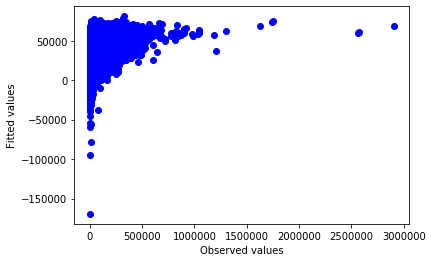

In [179]:
plt.scatter(y_train, y_pred1, c="b");plt.xlabel("Observed values");plt.ylabel("Fitted values")

In [180]:
# RMSE value

In [181]:
print("RMSE for training data: ",np.sqrt(metrics.mean_squared_error(y_train,y_pred1)))

RMSE for training data:  19776.471008406486


In [182]:
print("RMSE for testing data: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

RMSE for testing data:  18727.303516193173


### Random Forest

In [183]:
from sklearn.ensemble import RandomForestRegressor 

In [184]:
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)

In [185]:
regressor.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=20, random_state=0)

In [186]:
# Predicting the values using the model

In [187]:
Y_pred1 = regressor.predict(x_train) 

In [188]:
Y_pred2 = regressor.predict(x_test) 

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


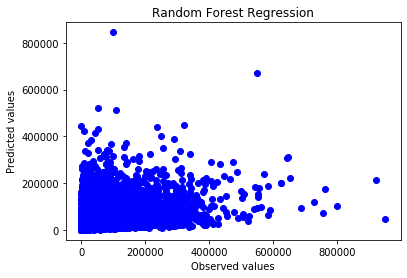

In [189]:
# plot predicted data 
plt.plot(y_test,Y_pred2,'bo')  
plt.title('Random Forest Regression') 
plt.xlabel('Observed values') 
plt.ylabel('Predicted values') 
plt.show()

In [190]:
# RMSE values

In [191]:
print('RMSE of training data:', np.sqrt(metrics.mean_squared_error(y_train, Y_pred1)))

RMSE of training data: 7753.655310958226


In [192]:
print('RMSE of testing data:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred2)))

RMSE of testing data: 18140.170745875083


### XG Boosting

In [193]:
from xgboost.sklearn import XGBRegressor

C:\Users\Admin\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [194]:
xg_reg = XGBRegressor() 

In [195]:
xg_reg.fit(x_train, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [196]:
# Predicting the values using the model

In [197]:
y_pred_xg1 = xg_reg.predict(x_train) 

In [198]:
y_pred_xg2 = xg_reg.predict(x_test) 

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


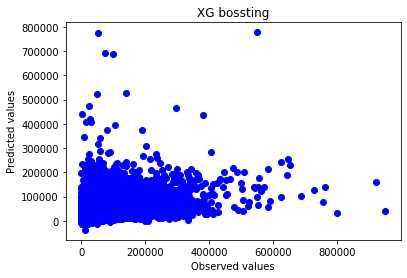

In [199]:
# plot predicted data 
plt.plot(y_test,y_pred_xg2,"bo")  
plt.title('XG bossting') 
plt.xlabel('Observed values') 
plt.ylabel('Predicted values') 
plt.show()

In [200]:
# RMSE values

In [201]:
print('RMSE Training data:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_xg1)))

RMSE Training data: 15492.011594602469


In [202]:
print('RMSE Testing data:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_xg2)))

RMSE Testing data: 17542.040516327874


### Hyper parameter tuning for XG Boosting

In [203]:
import xgboost

In [204]:
regressor=xgboost.XGBRegressor()

In [205]:
booster=['gbtree']
base_score=[0.5]

In [206]:
n_estimators = [100, 200]
max_depth = [10, 15]
learning_rate=[0.1,0.2]

In [207]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'booster':booster,
    'base_score':base_score
    }

In [208]:
from sklearn.model_selection import RandomizedSearchCV

In [209]:
# Set up the random search with 3-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=3, n_iter=20,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5, 
            return_train_score = True,
            random_state=36)

In [210]:
random_cv.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 58.8min
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed: 111.8min remaining:    0.0s
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed: 111.8min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [211]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [212]:
regressor = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [213]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [214]:
# Predicting the output values

In [215]:
y_pred_xgb1 = regressor.predict(x_train)

In [216]:
y_pred_xgb2 = regressor.predict(x_test)

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


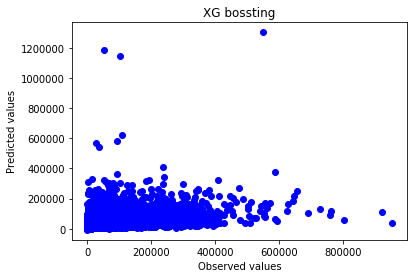

In [217]:
# plot predicted data 
plt.plot(y_test,y_pred_xgb2,"bo")  
plt.title('XG bossting') 
plt.xlabel('Observed values') 
plt.ylabel('Predicted values') 
plt.show()

In [218]:
# RMSE values

In [219]:
print('RMSE of training data:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_xgb1)))

RMSE of training data: 12737.94076187548


In [220]:
print('RMSE of testing data:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgb2)))

RMSE of testing data: 17679.70118104418
